In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from numpy import sqrt
from numpy import log
import datetime
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
from datetime import datetime,time
import statsmodels.formula.api as smf 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [4]:
data=pd.read_excel("D:/EXCELR Data Science/CO2 dataset.xlsx")
data.head()

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542


### EDA

In [5]:
data.shape

(215, 2)

In [6]:
data.isna().sum()

Year    0
CO2     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,215.0,1907.00000,62.209324,1800.00000,1853.50000,1907.00,1960.5,2014.0
CO2,215.0,6.74197,6.522437,0.00175,0.04105,6.39,11.5,18.2


In [10]:
data['Year']=pd.to_datetime(data['Year'],format='%Y')

In [11]:
df = data.set_index('Year')

In [12]:
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


{'whiskers': [<matplotlib.lines.Line2D at 0x21b03be5d90>,
 'caps': [<matplotlib.lines.Line2D at 0x21b03bfc430>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b03be5940>],
 'medians': [<matplotlib.lines.Line2D at 0x21b03bfcb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b03bfcee0>],
 'means': []}

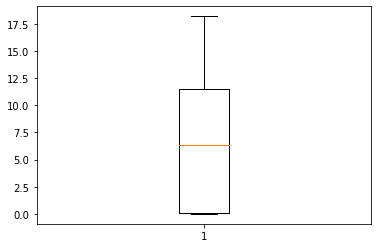

In [13]:
plt.boxplot(df['CO2'])

#### There are no outliers in data.

Text(0.5, 0, 'CO2 Emission')

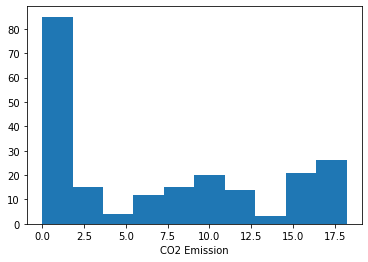

In [14]:
plt.hist(df)
plt.xlabel('CO2 Emission')

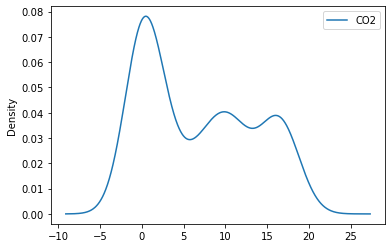

In [15]:
df.plot(kind='kde')
plt.show()

Text(0, 0.5, 'Year')

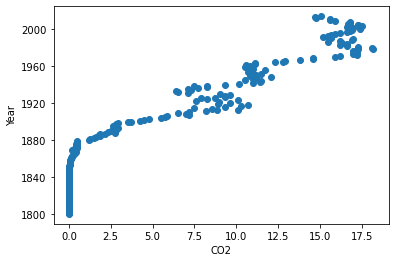

In [16]:
plt.scatter(data['CO2'],data['Year'])
plt.xlabel('CO2')
plt.ylabel('Year')

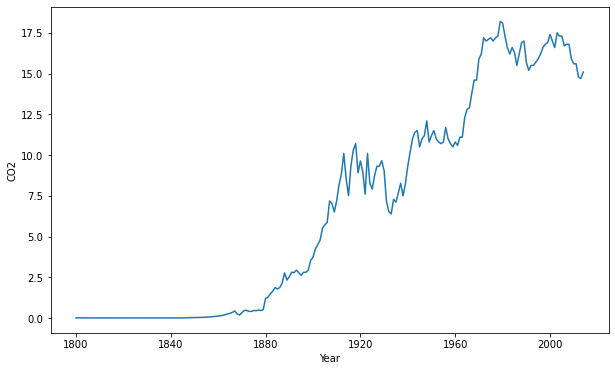

In [17]:
plt.figure(figsize=[10,6])
plt.xlabel("Year")
plt.ylabel('CO2')
plt.plot(df)
plt.show()

In [18]:
#Augmented Dickey-Fuller Test:

result=adfuller (df['CO2'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -0.378463
p-value: 0.913633
Critical values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


#### p value is greater than critical value. We accept H0. Our data is not stationary

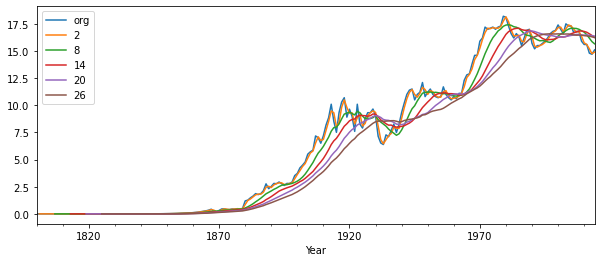

In [19]:
# moving average
plt.figure(figsize=(10,4))
df['CO2'].plot(label="org")       
for i in range(2,28,6):
    df['CO2'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')  

In [20]:
movingAverage1= df.rolling(window=12).mean()

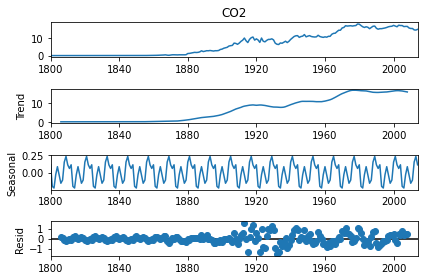

In [21]:
# time series decomposition plot
decompose_ts_add = seasonal_decompose(df.CO2,period=12) 
decompose_ts_add.plot()
plt.show()

### Making data stationary

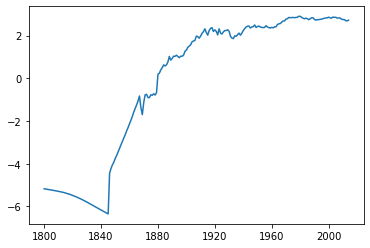

In [22]:
# Log Transformation
df_log = np.log(df)
plt.plot(df_log)
plt.show()

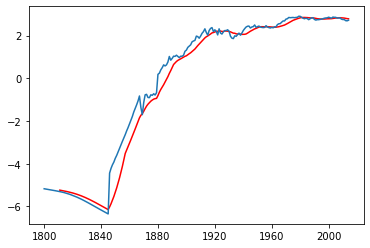

In [23]:
movingAverage= df_log.rolling(window=12).mean()
movingSTD = df_log.rolling(window=12).std()
plt.plot(movingAverage, color='red')
plt.plot(df_log)
plt.show()

In [24]:
df_logMinusmov_avg = df_log-movingAverage
df_logMinusmov_avg.head()

# remove null
df_logMinusmov_avg.dropna(inplace=True)
df_logMinusmov_avg.head()

,CO2
Year,
1811-01-01,-0.068296
1812-01-01,-0.070171
1813-01-01,-0.072085
1814-01-01,-0.075815
1815-01-01,-0.081437


In [25]:
 #Augmented Dickey-Fuller Test:

result=adfuller (df_logMinusmov_avg)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key,value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -2.819611
p-value: 0.055527
Critical values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


#### p value is greater than critical value. We accept H0. Data is non stationary still

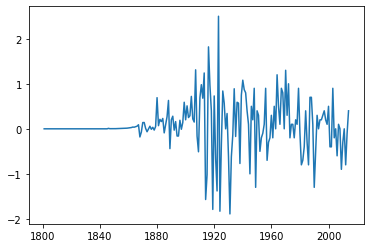

In [26]:
# First difference(Differencing method)

df1= df.diff()
plt.plot(df1)

In [27]:
# drop na
df1.dropna(inplace=True)

In [28]:
# Augmented Dicky Fuller test

result=adfuller (df1)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key,value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -3.780005
p-value: 0.003119
Critical values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


#### strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### Model Driven
### Autoarima

In [29]:
!pip install pmdarima


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

#### Data Splitting

In [31]:
# Splitting the data
train= df1.iloc[0:200,]
test = df1.iloc[200:,]

In [32]:
train.shape, test.shape

((200, 1), (14, 1))

### Autoarima

In [33]:
arima_model= auto_arima(train,
                       trace=True, allowmean=False, allowdrift = False,
                       start_p=0,d=0,start_q=0,max_p=8,max_d=3,max_q=8,start_P=0,D=0,start_Q=0,max_P=8,
                       max_D=3,max_Q=8,random_state=8,error_action='ignore',
                        suppress_warnings=True,stepwise=True)
                        


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=332.305, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=333.980, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=333.891, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=335.248, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=334.705, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.656 seconds


In [34]:
def forecast_accuracy(forecast, actual):
    rmse = sqrt(mean_squared_error(actual, forecast))
    return({ 'RMSE':rmse})

Plotting ARIMA model


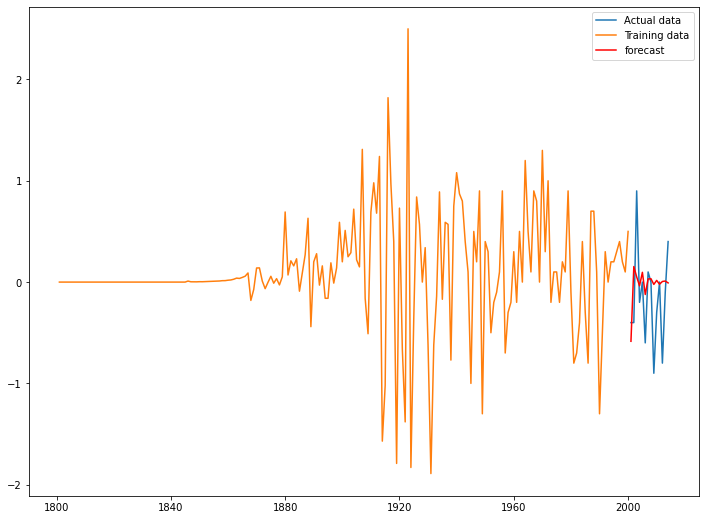

In [35]:
  # Autoarima

model = ARIMA(train, order=(4,2,1))
results_ARIMA = model.fit()
model_pred= results_ARIMA.predict(test.index[0],test.index[-1])

plt.figure(figsize=(12,9))
plt.plot(test,label='Actual data')
plt.plot(train,label='Training data')
plt.plot(model_pred, color='red',label='forecast')
plt.legend()
print('Plotting ARIMA model')
plt.show()

In [36]:
# error on the test data
model_acc= forecast_accuracy(model_pred.values,test.values)
model_acc

{'RMSE': 0.465090335502836}

Text(0.5, 1.0, 'Residue Plot')

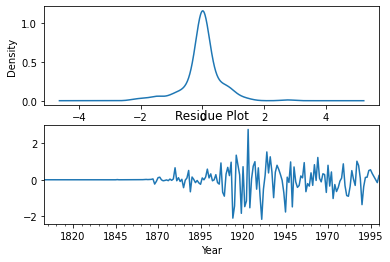

In [37]:
# Residue plot

plt.subplot(211)
results_ARIMA.resid.plot(kind='kde')
plt.subplot(212)
results_ARIMA.resid.plot()
plt.title('Residue Plot')

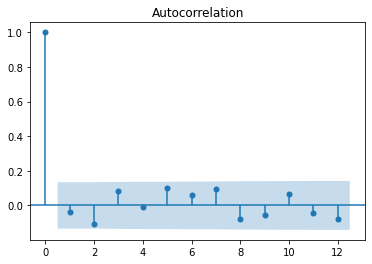

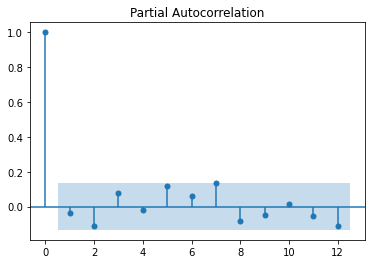

In [38]:
#acf and pacf plot
tsa_plots.plot_acf(df1,lags=12)     
tsa_plots.plot_pacf(df1,lags=12)
plt.show()

In [39]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [40]:
# evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0, 5)

evaluate_models(train.values, test.values,p_values, d_values, q_values)

Best ARIMANone RMSE=inf


#### Finding pdq value using for loop

In [41]:
import itertools
p = range(0,8)
q = range(0,8)
d = range(0,3)

In [42]:
pdq_combination = list(itertools.product(p,d,q))

In [43]:
len(pdq_combination)

192

In [44]:
rmse = []
order = []

In [45]:
for pdq in pdq_combination:
    try:
        model = ARIMA(train, order=pdq).fit()
        pred = model.predict(start=len(train),end=(len(df1)-1))
        error = np.sqrt(mean_squared_error(test,pred))
        order.append(pdq)
        rmse.append(error)
    except:
        continue

In [46]:
value_pqd = pd.DataFrame(index=order,data=rmse,columns=['rmse'])
value_pqd.sort_values('rmse')

,rmse
"(5, 1, 3)",0.412661
"(2, 1, 4)",0.416361
"(3, 1, 3)",0.417102
"(1, 1, 7)",0.426219
"(6, 2, 7)",0.439646
...,...
"(7, 0, 3)",0.630464
"(5, 2, 6)",0.630806
"(3, 0, 7)",0.643152
"(2, 0, 7)",0.644496


### ARIMA Model on stationary data.

Plotting ARIMA model1


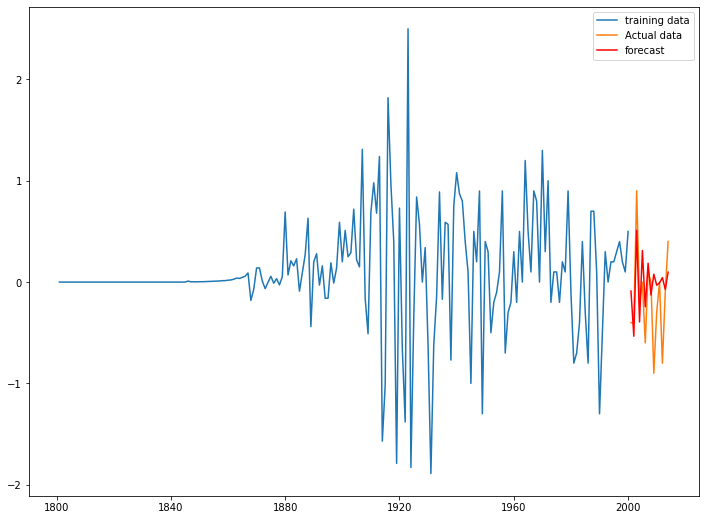

In [47]:
model1 = ARIMA(train, order=(5,1,3))   
results_ARIMA1 = model1.fit()
model1_pred= results_ARIMA1.predict(test.index[0],test.index[-1])
plt.figure(figsize=(12,9))
plt.plot(train,label='training data')
plt.plot(test,label='Actual data')
plt.plot(model1_pred, color='red',label='forecast')
print('Plotting ARIMA model1')
plt.legend()
plt.show()

In [48]:
# error on the test data
model1_acc= forecast_accuracy(model1_pred.values,test.values)
model1_acc

{'RMSE': 0.41266074680566717}

Plotting ARIMA model2


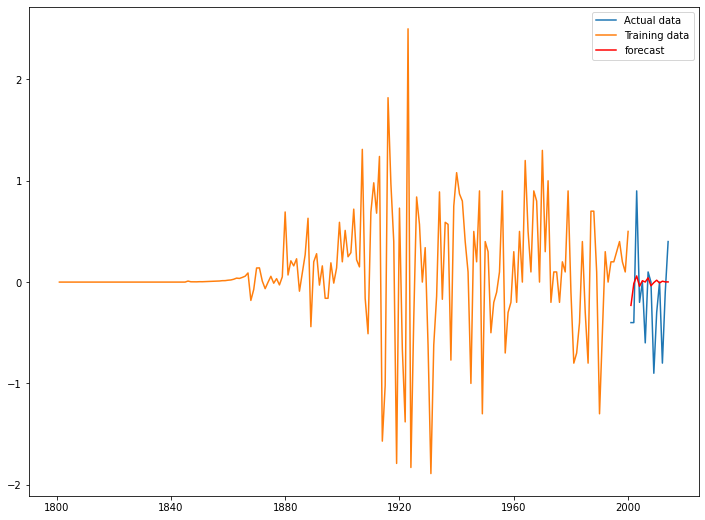

In [49]:
#AR model

plt.figure(figsize=(12,9))
model2 = ARIMA(train, order=(7,1,0))
results_ARIMA2 = model2.fit()
model2_pred= results_ARIMA2.predict(test.index[0],test.index[-1])
plt.plot(test,label='Actual data')
plt.plot(train,label='Training data')
plt.plot(model2_pred, color='red',label='forecast')
print('Plotting ARIMA model2')
plt.legend()
plt.show()

In [50]:
model2_acc= forecast_accuracy(model2_pred.values,test.values)
model2_acc

{'RMSE': 0.46276849809139664}

Plotting ARIMA model3


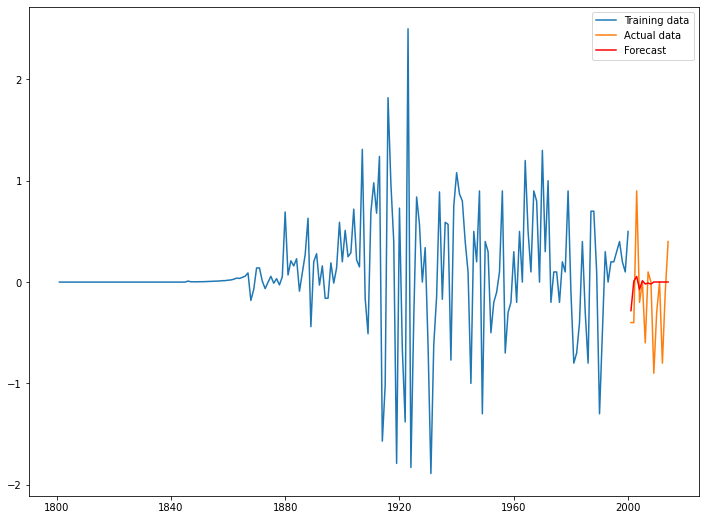

In [51]:
# MA model

plt.figure(figsize=(12,9))
model3 = ARIMA(train, order=(0,1,8))
results_ARIMA3 = model3.fit()
model3_pred= results_ARIMA3.predict(test.index[0],test.index[-1])

plt.plot(train,label='Training data')
plt.plot(test,label='Actual data')
plt.plot(model3_pred, color='red',label='Forecast')
plt.legend()
print('Plotting ARIMA model3')

In [52]:
model3_acc= forecast_accuracy(model3_pred.values,test.values)
model3_acc

{'RMSE': 0.4609394702445208}

### Arima model on original data

In [53]:
# Splitting the data

train1 = df.iloc[0:200,]
test1 = df.iloc[200:,]

In [54]:
train1.shape, test1.shape

((200, 1), (15, 1))

In [55]:
rmse1 = []
order1 = []

In [56]:
for pdq in pdq_combination:
    try:
        model1 = ARIMA(train, order=pdq).fit()
        pred1 = model1.predict(start=len(train1),end=(len(df)-1))
        error1 = np.sqrt(mean_squared_error(test1,pred1))
        order1.append(pdq)
        rmse1.append(error1)
    except:
        continue

In [57]:
value_pqd = pd.DataFrame(index=order1,data=rmse1,columns=['rmse1'])
value_pqd.sort_values('rmse1')

,rmse1
"(5, 0, 7)",16.226777
"(2, 0, 7)",16.228762
"(3, 0, 7)",16.231266
"(6, 0, 5)",16.236535
"(4, 0, 6)",16.238059
...,...
"(5, 2, 7)",16.408981
"(3, 2, 7)",16.411048
"(2, 2, 7)",16.412127
"(2, 2, 4)",16.412381


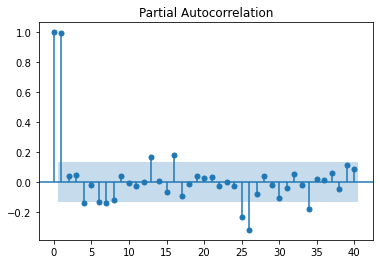

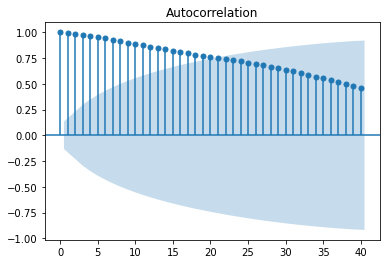

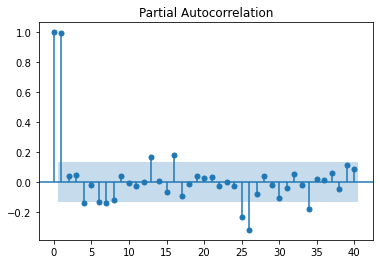

In [58]:
# acf and pacf plot for original data

tsa_plots.plot_acf(df,lags=40)
tsa_plots.plot_pacf(df,lags=40)

Plotting ARIMA model4


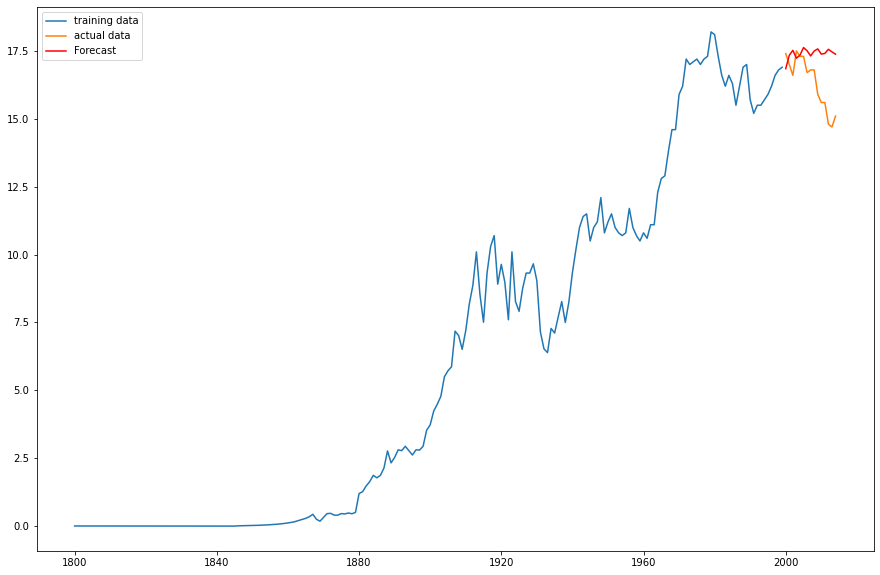

In [61]:
model4 = ARIMA(train1, order=(5,0,7))      
results_ARIMA4 = model4.fit()
model4_pred= results_ARIMA4.predict(test1.index[0],test1.index[-1])
plt.figure(figsize=(15,10))
plt.plot(train1,label='training data')
plt.plot(test1,label='actual data')
plt.plot(model4_pred, color='red',label='Forecast')
print('Plotting ARIMA model4')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [62]:
model4_acc= forecast_accuracy(model4_pred.values,test1.values)
model4_acc

{'RMSE': 1.473306927829452}

### Data Driven


#### Holt Method/Double Exponential smoothing

In [63]:
# Holt method 

hw_model = Holt(train1['CO2']).fit(smoothing_level=0.9, smoothing_slope=0.1)
pred_hw = hw_model.predict(start = test1.index[0],end = test1.index[-1])
forecast_accuracy(pred_hw,test1) 

{'RMSE': 1.7457536088695271}

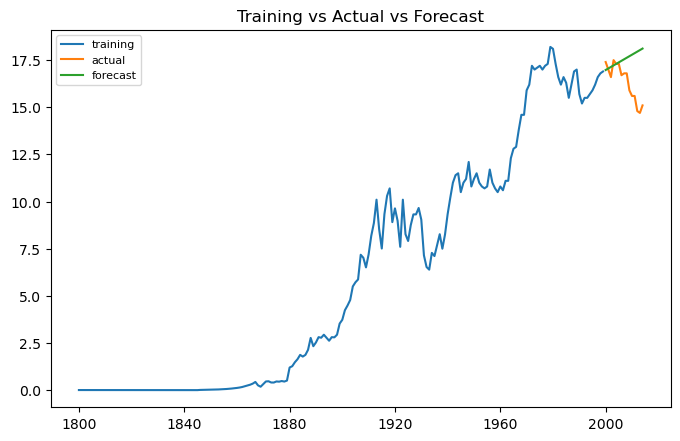

In [64]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(pred_hw, label='forecast')
plt.title('Training vs Actual vs Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Holt Winter Method/ Triple exponential

In [65]:
hwe_model_add = ExponentialSmoothing(train1,trend="add").fit()  
pred_hwe_add = hwe_model_add.predict(start = test1.index[0],end = test1.index[-1])
forecast_accuracy(pred_hwe_add,test1) 

{'RMSE': 1.7793839586462765}

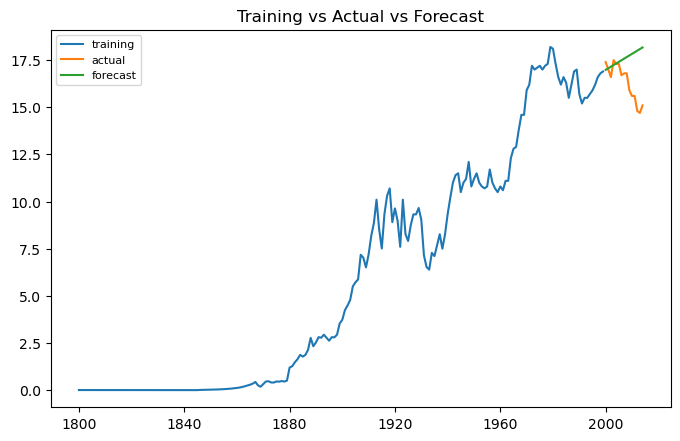

In [66]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(pred_hwe_add, label='forecast')
plt.title('Training vs Actual vs Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [67]:
hwe_model_mul = ExponentialSmoothing(train1,trend="mul").fit() 
pred_hwe_mul = hwe_model_mul.predict(start = test1.index[0],end = test1.index[-1])
forecast_accuracy(pred_hwe_mul,test1) 

{'RMSE': 2.2645230524861595}

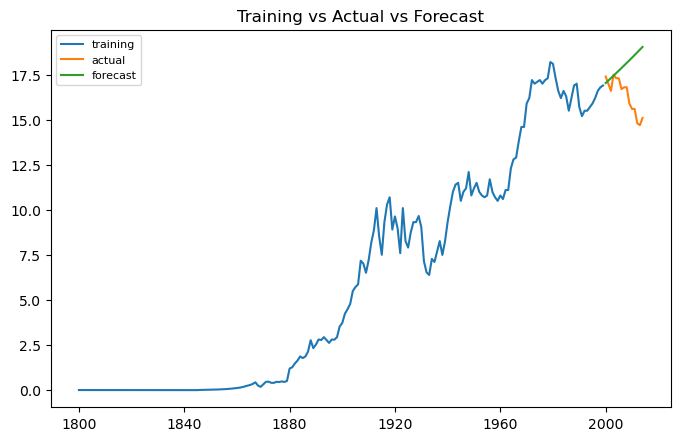

In [68]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(pred_hwe_mul, label='forecast')
plt.title('Training vs Actual vs Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [69]:
DF =[['Autoarima',0.4650,0.1059],['ARIMA_sd',0.4126,0.0939],['AR Model(7,1,0)',0.4627,0.1053],['MA Model(0,1,8)',0.4609,0.1049],['ARIMA_ns',1.4733,0.0809],['Holt Method model',1.7457,0.0959],['hwe_model_add',1.7793,0.0977],['hwe_model_mul',2.2645,0.1244]]
MODELS= pd.DataFrame(DF,columns=['Model','RMSE','Normalised RMSE'])

In [70]:
MODELS


,Model,RMSE,Normalised RMSE
0,Autoarima,0.4650,0.1059
1,ARIMA_sd,0.4126,0.0939
2,"AR Model(7,1,0)",0.4627,0.1053
3,"MA Model(0,1,8)",0.4609,0.1049
4,ARIMA_ns,1.4733,0.0809
5,Holt Method model,1.7457,0.0959
6,hwe_model_add,1.7793,0.0977
7,hwe_model_mul,2.2645,0.1244


In [71]:
MODELS.sort_values(by=['Normalised RMSE'],inplace=True)

In [72]:
MODELS

,Model,RMSE,Normalised RMSE
4,ARIMA_ns,1.4733,0.0809
1,ARIMA_sd,0.4126,0.0939
5,Holt Method model,1.7457,0.0959
6,hwe_model_add,1.7793,0.0977
3,"MA Model(0,1,8)",0.4609,0.1049
2,"AR Model(7,1,0)",0.4627,0.1053
0,Autoarima,0.4650,0.1059
7,hwe_model_mul,2.2645,0.1244


In [73]:
# For Non-stationary data
MaxminusMin = 18.200000-0.001750

In [74]:
normalised_RMSE = MODELS.RMSE[7]/ MaxminusMin

In [75]:
normalised_RMSE

0.1244350418309453

In [76]:
# For stationary data
MaxminusMin_stationarydata = 2.500 + 1.890

In [77]:
normalised_RMSE1 = MODELS.RMSE[0]/ MaxminusMin_stationarydata

In [78]:
normalised_RMSE1

0.1059225512528474

## Final Model

#### Finally we are going to choose ARIMA(5,0,7) as a final model.

In [79]:
final_model = ARIMA(df, order=(5,0,7))   
final_arima = final_model.fit()


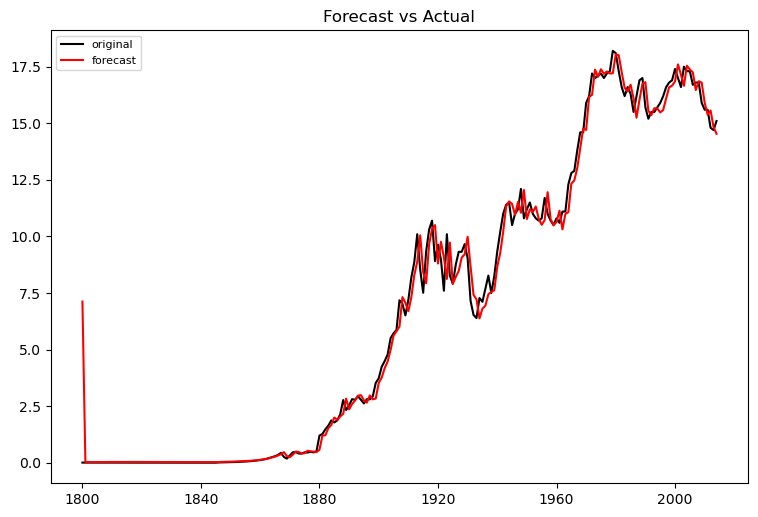

In [80]:
plt.figure(figsize=(9,6),dpi=100 )
plt.plot(df, label='original',color='black')
plt.plot(final_arima.fittedvalues, label='forecast',color='red')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Forecast for next 20 years

In [81]:
forecast=final_arima.forecast(20)

In [82]:
future_dates =[df.index[-1]+ DateOffset(years=x)for x in range(0,21)]
future_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df.tail()
len(future_df)

20

In [83]:
future_df

,CO2
2015-01-01,NaN
2016-01-01,NaN
2017-01-01,NaN
2018-01-01,NaN
2019-01-01,NaN
2020-01-01,NaN
2021-01-01,NaN
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN


In [84]:
len(future_df)

20

In [85]:
future_df['CO2'] = final_arima.predict(start = 215, end = 235, dynamic= True) 


In [86]:
future_df

,CO2
2015-01-01,14.755495
2016-01-01,14.683349
2017-01-01,14.652586
2018-01-01,14.417827
2019-01-01,14.335127
2020-01-01,14.522816
2021-01-01,14.531275
2022-01-01,14.291328
2023-01-01,14.334739
2024-01-01,14.448541


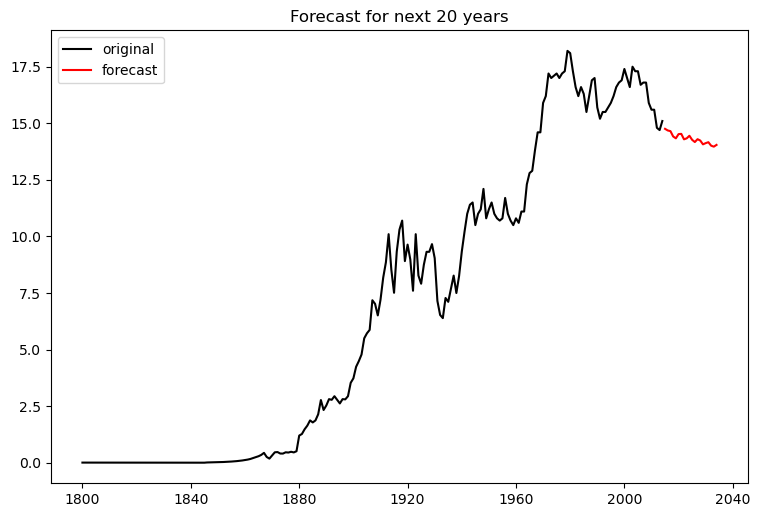

In [87]:
plt.figure(figsize=(9,6), dpi=100)
plt.plot(df, label='original',color='black')
plt.plot(future_df['CO2'], label='forecast',color='red')
plt.title('Forecast for next 20 years')
plt.legend()
plt.show()


### Deployment

In [77]:
import pickle
import streamlit as st
import os
from pickle import dump
from pickle import load

In [132]:
# saving the pickle file

dump(final_arima,open('Forecast_arima.pkl','wb'))

In [133]:
os.path.abspath('Forecast_arima.pkl')

'C:\\Users\\Admin\\Forecast_arima.pkl'

In [124]:
forecast= future_df[[ 'CO2']]

In [127]:
forecast.to_csv('Future_CO2_Emission.csv')

In [136]:
df.to_csv('CO2 dataset.csv')

In [ ]:
!streamlit run forecasting.py